In [1]:
#Loading the required libraries

import pandas as pd
import numpy as np

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("credit_customers.csv")

In [3]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [4]:
data.shape

(1000, 21)

In [5]:
data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [6]:
data.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [7]:
data.describe(include="all")

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,2
top,no checking,NaN,existing paid,radio/tv,NaN,<100,1<=X<4,NaN,male single,none,...,car,NaN,none,own,NaN,skilled,NaN,none,yes,good
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


In [8]:
# Handling Missing Data

#Missing value analysis and dropping the records with missing values

#identify total no. of null values for each column
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [9]:
cat= data.select_dtypes(exclude=[np.number])
for i in list(cat.columns):
    data[i]=data[i].astype('category')

# Cheking Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [10]:
# Label Encoding & Scaling
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [11]:
# Label Encoding
for i in list(cat.columns):
    data[i+'_encoder']=LabelEncoder().fit_transform(data[i])

# Taking only numerical features
num=data.select_dtypes(include=[np.number])

# Data Scaling
scale_data=pd.DataFrame(MinMaxScaler().fit_transform(num.to_numpy()),columns=num.columns)

# Scaled Data
scale_data.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_encoder,credit_history_encoder,purpose_encoder,...,employment_encoder,personal_status_encoder,other_parties_encoder,property_magnitude_encoder,other_payment_plans_encoder,housing_encoder,job_encoder,own_telephone_encoder,foreign_worker_encoder,class_encoder
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.333333,0.25,0.666667,...,0.75,1.0,1.0,1.000000,0.5,0.5,0.333333,1.0,1.0,1.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.000000,0.75,0.666667,...,0.00,0.0,1.0,1.000000,0.5,0.5,0.333333,0.0,1.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1.000000,0.25,0.222222,...,0.25,1.0,1.0,1.000000,0.5,0.5,1.000000,0.0,1.0,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.333333,0.75,0.333333,...,0.25,1.0,0.5,0.333333,0.5,0.0,0.333333,0.0,1.0,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.333333,0.50,0.444444,...,0.00,1.0,1.0,0.666667,0.5,0.0,0.333333,0.0,1.0,0.0


In [12]:
x=scale_data.drop('class_encoder',axis=1)
y=scale_data['class_encoder']

#Split the data in to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:
x_train.shape

(700, 20)

In [14]:
x_train.columns

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'checking_status_encoder', 'credit_history_encoder', 'purpose_encoder',
       'savings_status_encoder', 'employment_encoder',
       'personal_status_encoder', 'other_parties_encoder',
       'property_magnitude_encoder', 'other_payment_plans_encoder',
       'housing_encoder', 'job_encoder', 'own_telephone_encoder',
       'foreign_worker_encoder'],
      dtype='object')

In [15]:
#recursive feature elimination technique
from sklearn.feature_selection import RFE

DT=tree.DecisionTreeClassifier(random_state=42)

rfe_DT=RFE(DT,n_features_to_select=12,verbose=21)

rfe_DT.fit(x_train,y_train)

names=x_train.columns.tolist()

b=rfe_DT.ranking_

#RFE: Recursive Feature Elimination is corresponding to Machine Learning Model.
#ranking is a attribute

a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])

#a.to_csv('feature_selection.csv')

RFE_selected=a['features'][a['rank']==1]

RFE_selected

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.


0                            age
1        checking_status_encoder
2                  credit_amount
3         credit_history_encoder
4                       duration
5             employment_encoder
6               existing_credits
7          other_parties_encoder
8        personal_status_encoder
9     property_magnitude_encoder
10               purpose_encoder
11        savings_status_encoder
Name: features, dtype: object

In [16]:
x_train=x_train[RFE_selected]
x_test=x_test[RFE_selected]

In [17]:
x_test.shape,x_train.shape

((300, 12), (700, 12))

In [18]:
# Decision Tree Model
def model_dt(x_train, x_test, y_train, y_test):
    global acc_dt, f1_dt, train_acc_dt

    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)

    conf_dt = confusion_matrix(y_test, y_pred)
    acc_dt = accuracy_score(y_test, y_pred)
    f1_dt = f1_score(y_test, y_pred)

    # Predict on the training set
    y_train_pred = dt.predict(x_train)
    train_acc_dt = accuracy_score(y_train, y_train_pred)

    clf_dt = classification_report(y_test, y_pred)

    print('Decision Tree')
    print('\n')
    print('Training Accuracy: ', train_acc_dt)
    print('Test Accuracy : ', acc_dt)
    print('F1 Score : ', f1_dt)
    print(10 * '=====')
    print('Confusion Matrix :\n', conf_dt)
    print(10 * '=====')
    print('Classification Report :\n', clf_dt)
    print(30 * '========')

    return train_acc_dt, acc_dt

In [19]:
model_dt(x_train, x_test, y_train, y_test)

Decision Tree


Training Accuracy:  1.0
Test Accuracy :  0.6833333333333333
F1 Score :  0.7677261613691932
Confusion Matrix :
 [[ 48  38]
 [ 57 157]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.46      0.56      0.50        86
         1.0       0.81      0.73      0.77       214

    accuracy                           0.68       300
   macro avg       0.63      0.65      0.64       300
weighted avg       0.71      0.68      0.69       300



(1.0, 0.6833333333333333)

In [20]:
#Building a Basic Decision Tree Model

#default decision tree algorithm
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
clf#default algorithm
clf.feature_importances_

array([0.13431836, 0.12947228, 0.22731963, 0.05732331, 0.10370385,
       0.06396487, 0.01918111, 0.04994008, 0.03371859, 0.04366675,
       0.09240638, 0.04498478])

In [22]:
importances = clf.feature_importances_

In [23]:
importances.shape

(12,)

In [24]:
clf.feature_importances_

array([0.13431836, 0.12947228, 0.22731963, 0.05732331, 0.10370385,
       0.06396487, 0.01918111, 0.04994008, 0.03371859, 0.04366675,
       0.09240638, 0.04498478])

In [25]:
df_imp=pd.DataFrame({'features':x_train.columns,'imortances':clf.feature_importances_})

df_imp=df_imp.sort_values(by='imortances',ascending=False)

df_imp

,features,imortances
2,credit_amount,0.227320
0,age,0.134318
1,checking_status_encoder,0.129472
4,duration,0.103704
10,purpose_encoder,0.092406
5,employment_encoder,0.063965
3,credit_history_encoder,0.057323
7,other_parties_encoder,0.049940
11,savings_status_encoder,0.044985
9,property_magnitude_encoder,0.043667


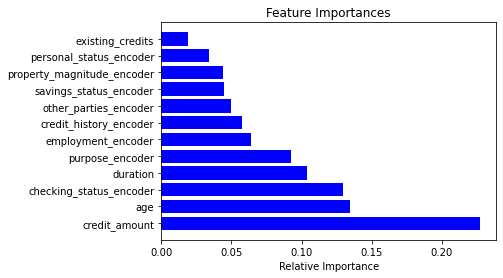

In [26]:
#Ploting the Feature importances
plt.title('Feature Importances')
plt.barh(df_imp['features'], df_imp['imortances'], color='blue')
plt.yticks(df_imp['features'])
plt.xlabel('Relative Importance')
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model
best_dt = grid_search.best_estimator_

# Fit the best model on the training data
best_dt.fit(x_train, y_train)

# Predict on the train and test data using the best model
train_pred = best_dt.predict(x_train)
test_pred = best_dt.predict(x_test)

# Perform evaluation and print the results
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
Train Accuracy: 0.8328571428571429
Test Accuracy: 0.72


In [28]:
# Logistic Regression Model
def model_lr(x_train, x_test, y_train, y_test):
    global acc_lr, f1_lr, train_acc_lr

    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)

    conf_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred)
    f1_lr = f1_score(y_test, y_pred)

    # Predict on the training set
    y_train_pred = lr.predict(x_train)
    train_acc_lr = accuracy_score(y_train, y_train_pred)

    clf_lr = classification_report(y_test, y_pred)

    print('Logistic Regression')
    print('\n')
    print('Training Accuracy: ', train_acc_lr)
    print('Test Accuracy : ', acc_lr)
    print('F1 Score : ', f1_lr)
    print(10 * '=====')
    print('Confusion Matrix :\n', conf_lr)
    print(10 * '=====')
    print('Classification Report :\n', clf_lr)
    print(30 * '========')

    return train_acc_lr, acc_lr


In [29]:
model_lr(x_train, x_test, y_train, y_test)

Logistic Regression


Training Accuracy:  0.7214285714285714
Test Accuracy :  0.7166666666666667
F1 Score :  0.8187633262260128
Confusion Matrix :
 [[ 23  63]
 [ 22 192]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.51      0.27      0.35        86
         1.0       0.75      0.90      0.82       214

    accuracy                           0.72       300
   macro avg       0.63      0.58      0.58       300
weighted avg       0.68      0.72      0.68       300



(0.7214285714285714, 0.7166666666666667)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a Logistic Regression classifier
lr = LogisticRegression()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_scaled, y_train)

# Get the best model
best_lr = grid_search.best_estimator_

# Fit the best model on the training data
best_lr.fit(x_train_scaled, y_train)

# Predict on the train and test data using the best model
train_pred = best_lr.predict(x_train_scaled)
test_pred = best_lr.predict(x_test_scaled)

# Perform evaluation and print the results
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Train Accuracy: 0.6942857142857143
Test Accuracy: 0.7133333333333334


In [31]:
# Naive Bayes Model
def model_nb(x_train, x_test, y_train, y_test):
    global acc_nb, f1_nb, train_acc_nb

    nb = GaussianNB()
    nb.fit(x_train, y_train)
    y_pred = nb.predict(x_test)

    conf_nb = confusion_matrix(y_test, y_pred)
    acc_nb = accuracy_score(y_test, y_pred)
    f1_nb = f1_score(y_test, y_pred)

    # Predict on the training set
    y_train_pred = nb.predict(x_train)
    train_acc_nb = accuracy_score(y_train, y_train_pred)

    clf_nb = classification_report(y_test, y_pred)

    print('Gaussian Naive Bayes')
    print('\n')
    print('Training Accuracy: ', train_acc_nb)
    print('Test Accuracy : ', acc_nb)
    print('F1 Score : ', f1_nb)
    print(10 * '=====')
    print('Confusion Matrix :\n', conf_nb)
    print(10 * '=====')
    print('Classification Report :\n', clf_nb)
    print(30 * '========')

    return train_acc_nb, acc_nb

In [32]:
model_nb(x_train, x_test, y_train, y_test)

Gaussian Naive Bayes


Training Accuracy:  0.7371428571428571
Test Accuracy :  0.71
F1 Score :  0.8053691275167785
Confusion Matrix :
 [[ 33  53]
 [ 34 180]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.49      0.38      0.43        86
         1.0       0.77      0.84      0.81       214

    accuracy                           0.71       300
   macro avg       0.63      0.61      0.62       300
weighted avg       0.69      0.71      0.70       300



(0.7371428571428571, 0.71)

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Naive Bayes classifier
nb = GaussianNB()

# Fit the model on the training data
nb.fit(x_train, y_train)

# Predict on the train and test data
train_pred = nb.predict(x_train)
test_pred = nb.predict(x_test)

# Perform evaluation and print the results
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.7371428571428571
Test Accuracy: 0.71


In [34]:
# Random Forest Model
def model_rf(x_train, x_test, y_train, y_test):
    global acc_rf, f1_rf, train_acc_rf

    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)

    conf_rf = confusion_matrix(y_test, y_pred)
    acc_rf = accuracy_score(y_test, y_pred)
    f1_rf = f1_score(y_test, y_pred)

    # Predict on the training set
    y_train_pred = rf.predict(x_train)
    train_acc_rf = accuracy_score(y_train, y_train_pred)

    clf_rf = classification_report(y_test, y_pred)

    print('Random Forest')
    print('\n')
    print('Training Accuracy: ', train_acc_rf)
    print('Test Accuracy : ', acc_rf)
    print('F1 Score : ', f1_rf)
    print(10 * '=====')
    print('Confusion Matrix :\n', conf_rf)
    print(10 * '=====')
    print('Classification Report :\n', clf_rf)
    print(30 * '========')

    return train_acc_rf, acc_rf

In [35]:
model_rf(x_train, x_test, y_train, y_test)

Random Forest


Training Accuracy:  1.0
Test Accuracy :  0.7933333333333333
F1 Score :  0.8616071428571428
Confusion Matrix :
 [[ 45  41]
 [ 21 193]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.68      0.52      0.59        86
         1.0       0.82      0.90      0.86       214

    accuracy                           0.79       300
   macro avg       0.75      0.71      0.73       300
weighted avg       0.78      0.79      0.78       300



(1.0, 0.7933333333333333)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Create a random forest classifier
rf = RandomForestClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Fit the best model on the training data
best_rf.fit(x_train, y_train)

# Predict on the train and test data using the best model
train_pred = best_rf.predict(x_train)
test_pred = best_rf.predict(x_test)

# Perform evaluation and print the results
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Train Accuracy: 0.9471428571428572
Test Accuracy: 0.7866666666666666


In [37]:
# Adaptive Boosting Model
def model_ab(x_train, x_test, y_train, y_test):
    global acc_ab, f1_ab, train_acc_ab

    ab = AdaBoostClassifier()
    ab.fit(x_train, y_train)
    y_pred = ab.predict(x_test)

    conf_ab = confusion_matrix(y_test, y_pred)
    acc_ab = accuracy_score(y_test, y_pred)
    f1_ab = f1_score(y_test, y_pred)

    # Predict on the training set
    y_train_pred = ab.predict(x_train)
    train_acc_ab = accuracy_score(y_train, y_train_pred)

    clf_ab = classification_report(y_test, y_pred)

    print('Adaptive Boosting')
    print('\n')
    print('Training Accuracy: ', train_acc_ab)
    print('Test Accuracy : ', acc_ab)
    print('F1 Score : ', f1_ab)
    print(10 * '=====')
    print('Confusion Matrix :\n', conf_ab)
    print(10 * '=====')
    print('Classification Report :\n', clf_ab)
    print(30 * '========')

    return train_acc_ab, acc_ab

In [38]:
model_ab(x_train, x_test, y_train, y_test)

Adaptive Boosting


Training Accuracy:  0.8071428571428572
Test Accuracy :  0.7733333333333333
F1 Score :  0.8495575221238938
Confusion Matrix :
 [[ 40  46]
 [ 22 192]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.65      0.47      0.54        86
         1.0       0.81      0.90      0.85       214

    accuracy                           0.77       300
   macro avg       0.73      0.68      0.70       300
weighted avg       0.76      0.77      0.76       300



(0.8071428571428572, 0.7733333333333333)

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier()
# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model
best_adaboost = grid_search.best_estimator_

# Fit the best model on the training data
best_adaboost.fit(x_train, y_train)

# Predict on the train and test data using the best model
train_pred = best_adaboost.predict(x_train)
test_pred = best_adaboost.predict(x_test)

# Perform evaluation and print the results
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 100}
Train Accuracy: 0.8128571428571428
Test Accuracy: 0.76


In [40]:
# K Nearest Neighbor Model
def model_knn(x_train, x_test, y_train, y_test):
    global acc_knn, f1_knn, train_acc_knn

    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    conf_knn = confusion_matrix(y_test, y_pred)
    acc_knn = accuracy_score(y_test, y_pred)
    f1_knn = f1_score(y_test, y_pred)

    # Predict on the training set
    y_train_pred = knn.predict(x_train)
    train_acc_knn = accuracy_score(y_train, y_train_pred)

    clf_knn = classification_report(y_test, y_pred)

    print('K Nearest Neighbor')
    print('\n')
    print('Training Accuracy: ', train_acc_knn)
    print('Test Accuracy : ', acc_knn)
    print('F1 Score : ', f1_knn)
    print(10 * '=====')
    print('Confusion Matrix :\n', conf_knn)
    print(10 * '=====')
    print('Classification Report :\n', clf_knn)
    print(30 * '========')

    return train_acc_knn, acc_knn

In [41]:
model_knn(x_train, x_test, y_train, y_test)

K Nearest Neighbor


Training Accuracy:  0.8028571428571428
Test Accuracy :  0.7133333333333334
F1 Score :  0.8080357142857143
Confusion Matrix :
 [[ 33  53]
 [ 33 181]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.50      0.38      0.43        86
         1.0       0.77      0.85      0.81       214

    accuracy                           0.71       300
   macro avg       0.64      0.61      0.62       300
weighted avg       0.70      0.71      0.70       300



(0.8028571428571428, 0.7133333333333334)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Fit the best model on the training data
best_knn.fit(x_train, y_train)

# Predict on the train and test data using the best model
train_pred = best_knn.predict(x_train)
test_pred = best_knn.predict(x_test)

# Perform evaluation and print the results
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Train Accuracy: 1.0
Test Accuracy: 0.7166666666666667


In [43]:
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic Regreesion','Gaussian NB','Decision Tree','KNN','Random Forest','Adaptive Boosting'])
tbl['Accuracy']=pd.Series([acc_lr,acc_nb,acc_dt,acc_knn,acc_rf,acc_ab])
tbl['F1_Score']=pd.Series([f1_lr,f1_nb,f1_dt,f1_knn,f1_rf,f1_ab])
tbl.set_index('Model')

,Accuracy,F1_Score
Model,,
Logistic Regreesion,0.716667,0.818763
Gaussian NB,0.710000,0.805369
Decision Tree,0.683333,0.767726
KNN,0.713333,0.808036
Random Forest,0.793333,0.861607
Adaptive Boosting,0.773333,0.849558


In [44]:
tbl.sort_values('F1_Score',ascending=False)

,Model,Accuracy,F1_Score
4,Random Forest,0.793333,0.861607
5,Adaptive Boosting,0.773333,0.849558
0,Logistic Regreesion,0.716667,0.818763
3,KNN,0.713333,0.808036
1,Gaussian NB,0.710000,0.805369
2,Decision Tree,0.683333,0.767726


In [45]:
# Using cross validation method to avoid overfitting
import statistics as st
# Model building
lr =LogisticRegression()
nb=GaussianNB()
dct=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
m  =[lr,nb,dct,knn,rf,ab]
model_name=['Logistic Regression','Gaussian NB','Decetion TRee','KNN','Random forest','Adaptive Boost']

results, mean_results, p, f1_test=list(),list(),list(),list()

In [46]:
# Using cross validation method to avoid overfitting
import statistics as st
# Model building
lr =LogisticRegression()
nb=GaussianNB()
dct=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
m  =[lr,nb,dct,knn,rf,ab]
model_name=['Logistic Regression','Gaussian NB','Decetion TRee','KNN','Random forest','Adaptive Boost']

results, mean_results, p, f1_test=list(),list(),list(),list()

In [47]:
#Model fitting,cross-validating and evaluating performance

def algor(model):
    print('\n',i)
    pipe=Pipeline([('model',model)])
    pipe.fit(x_train,y_train)
    cv=StratifiedKFold(n_splits=5)
    n_scores=cross_val_score(pipe,x_train,y_train,scoring='f1_weighted',cv=cv,n_jobs=-1,error_score='raise') # As it is an Imbalance data so f1 score will give a better accuracy than normal accuracy.
    results.append(n_scores)
    mean_results.append(st.mean(n_scores))
    print('f1-Score(train): mean= (%.3f), min=(%.3f)) ,max= (%.3f), stdev= (%.3f)'%(st.mean(n_scores), min(n_scores), max(n_scores),np.std(n_scores)))
    y_pred=cross_val_predict(model,x_train,y_train,cv=cv)
    p.append(y_pred)
    f1=f1_score(y_train,y_pred, average = 'weighted')
    f1_test.append(f1)
    print('f1-Score(test): %.4f'%(f1))

for i in m:
    algor(i)


 LogisticRegression()
f1-Score(train): mean= (0.673), min=(0.622)) ,max= (0.724), stdev= (0.034)
f1-Score(test): 0.6740

 GaussianNB()
f1-Score(train): mean= (0.691), min=(0.646)) ,max= (0.785), stdev= (0.049)
f1-Score(test): 0.6911

 DecisionTreeClassifier()
f1-Score(train): mean= (0.679), min=(0.649)) ,max= (0.738), stdev= (0.033)
f1-Score(test): 0.6954

 KNeighborsClassifier()
f1-Score(train): mean= (0.679), min=(0.654)) ,max= (0.708), stdev= (0.020)
f1-Score(test): 0.6794

 RandomForestClassifier()
f1-Score(train): mean= (0.737), min=(0.717)) ,max= (0.766), stdev= (0.016)
f1-Score(test): 0.7373

 AdaBoostClassifier()
f1-Score(train): mean= (0.730), min=(0.697)) ,max= (0.779), stdev= (0.030)
f1-Score(test): 0.7298


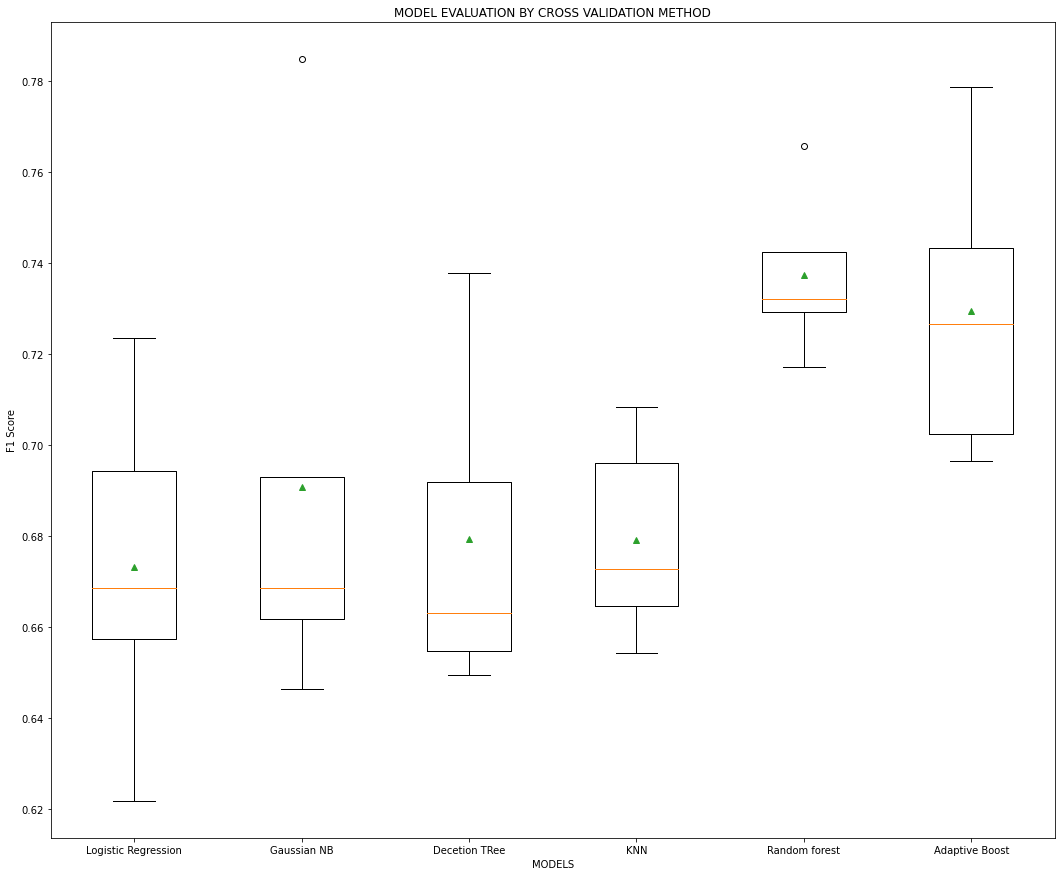

In [48]:
# Model comparison By Visualizing 

fig=plt.subplots(figsize=(18,15))
plt.title('MODEL EVALUATION BY CROSS VALIDATION METHOD')
plt.xlabel('MODELS')
plt.ylabel('F1 Score')
plt.boxplot(results,labels=model_name,showmeans=True)
plt.show()

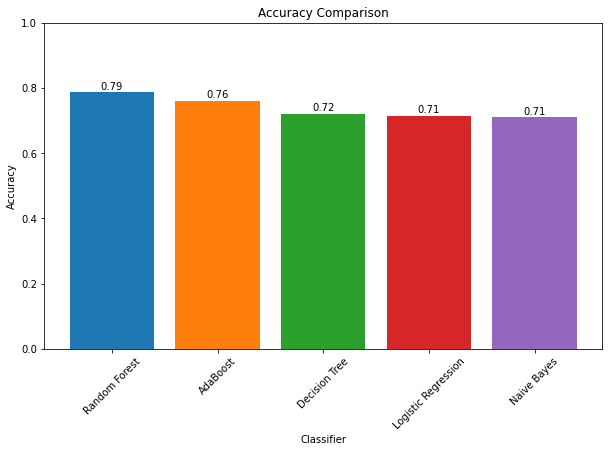

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define a list of classifiers and their names
classifiers = [
    ('Random Forest', best_rf),
    ('AdaBoost', best_adaboost),
    ('Decision Tree', best_dt),
    ('Logistic Regression', best_lr),
    ('Naive Bayes', nb)
]

# Initialize lists to store model names and accuracy scores
model_names = []
accuracy_scores = []

# Calculate accuracy score for each classifier
for name, classifier in classifiers:
    accuracy = accuracy_score(y_test, classifier.predict(x_test))
    model_names.append(name)
    accuracy_scores.append(accuracy)

# Generate a list of colors for the models
colors = plt.cm.tab10(np.arange(len(model_names)))

# Plot accuracy comparison vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colors)
plt.ylim([0.0, 1.0])
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title('Accuracy Comparison')

# Add accuracy values above the bars
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()


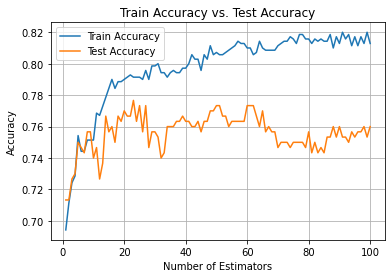

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of values for the number of estimators
num_estimators_range = np.arange(1, 101)

# Initialize lists to store the accuracy values
train_accuracy_scores = []
test_accuracy_scores = []

# Iterate over the range of values
for num_estimators in num_estimators_range:
    # Create and train the AdaBoost model with the current number of estimators
    ab = AdaBoostClassifier(n_estimators=num_estimators)
    ab.fit(x_train, y_train)
    
    # Evaluate the model on the training set
    y_train_pred = ab.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Evaluate the model on the test set
    y_test_pred = ab.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append the accuracy values to the respective lists
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plotting the graph
plt.plot(num_estimators_range, train_accuracy_scores, label='Train Accuracy')
plt.plot(num_estimators_range, test_accuracy_scores, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs. Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


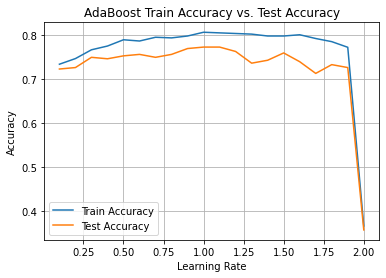

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of values for the learning rate
learning_rate_range = np.linspace(0.1, 2.0, num=20)

# Initialize lists to store the accuracy values
train_accuracy_scores = []
test_accuracy_scores = []

# Iterate over the range of values
for learning_rate in learning_rate_range:
    # Create and train the AdaBoost model with the current learning rate
    ab = AdaBoostClassifier(learning_rate=learning_rate)
    ab.fit(x_train, y_train)
    
    # Evaluate the model on the training set
    y_train_pred = ab.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Evaluate the model on the test set
    y_test_pred = ab.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append the accuracy values to the respective lists
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plotting the graph
plt.plot(learning_rate_range, train_accuracy_scores, label='Train Accuracy')
plt.plot(learning_rate_range, test_accuracy_scores, label='Test Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('AdaBoost Train Accuracy vs. Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# defining the classifier
model = AdaBoostClassifier(random_state=1)

# creating a dic for the grid
grid = dict()

# estimator till 500
grid['n_estimators'] = [10, 50, 100, 200, 500]

# defining learning rate
grid['learning_rate'] = [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]


# defining the CV
cv = StratifiedKFold(n_splits=5)

# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,cv=cv,scoring='f1_weighted')

In [53]:
# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(x_train,y_train)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.735681 using {'learning_rate': 1.1, 'n_estimators': 100}


In [54]:
#hyperparameter tuning without cross validation
#Tuned Model for prediction
x=scale_data.drop('class_encoder',axis=1)
y=scale_data['class_encoder']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)



ab=AdaBoostClassifier(learning_rate= 1.1, n_estimators = 10,random_state=1)

ab.fit(x_train,y_train)
y_pred=ab.predict(x_test)
# Model Evaluation
    
conf=confusion_matrix(y_test,y_pred)
acc_ab=accuracy_score(y_test,y_pred)
f1_ab=f1_score(y_test,y_pred,average='weighted')

print('Accuracy: ',acc_ab)
print('F1 Score: ',f1_ab)
print(10*'===========')
print('Confusion Matrix: \n',conf)
print(10*'===========')
print('Classification Report: \n',classification_report(y_test,y_pred))

Accuracy:  0.75
F1 Score:  0.7256869772998806
Confusion Matrix: 
 [[ 30  56]
 [ 19 195]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.61      0.35      0.44        86
         1.0       0.78      0.91      0.84       214

    accuracy                           0.75       300
   macro avg       0.69      0.63      0.64       300
weighted avg       0.73      0.75      0.73       300



In [55]:
#hptuning with cross validation
adb= AdaBoostClassifier(learning_rate= 1.1, n_estimators = 10,random_state=1)
cv=StratifiedKFold(n_splits=5)
n_scores=cross_val_score(ab,x_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise',)
y_pred=cross_val_predict(ab,x_train,y_train,cv=cv)


acc_tst=accuracy_score(y_train,y_pred)


print('AdaBoost Accuracy')
print('\n')
print('Testing Accuracy Score : ',acc_tst)

AdaBoost Accuracy


Testing Accuracy Score :  0.7414285714285714


In [56]:
ab= AdaBoostClassifier(learning_rate= 1.1, n_estimators = 10,random_state=1)
cv=StratifiedKFold(n_splits=5)
n_scores=cross_val_score(ab,x_train,y_train,scoring='f1_weighted',cv=cv,n_jobs=-1,error_score='raise')
y_pred=cross_val_predict(ab,x_train,y_train,cv=cv)

f1=f1_score(y_train,y_pred, average = 'weighted')

print('AdaBoost F1')
print('\n')
print('F1 Score : ',f1)

AdaBoost F1


F1 Score :  0.7353290829203646


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier
ab = AdaBoostClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ab, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_n_estimators = grid_search.best_params_['n_estimators']
best_learning_rate = grid_search.best_params_['learning_rate']

print("Best n_estimators:", best_n_estimators)
print("Best learning_rate:", best_learning_rate)


Best n_estimators: 50
Best learning_rate: 1.0


In [58]:
def get_predictions(x_train, y_train, ab):
    y_train_pred_final = pd.DataFrame({'credit_risk': y_train.values, 'credit_risk_Prob': ab.predict_proba(x_train)[:, 1]})
    y_train_pred_final['Cust_ID'] = y_train.index
    y_train_pred_final = y_train_pred_final.reindex(['Cust_ID', 'credit_risk', 'credit_risk_Prob'], axis=1)
    y_train_pred_final['predicted'] = y_train_pred_final.credit_risk_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

# Create an AdaBoost classifier with optimal hyperparameters
ab = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)

# Fit the classifier on the training data
ab.fit(x_train, y_train)

# Get the predictions on the training data
y_train_pred_final = get_predictions(x_train, y_train, ab)

# Display the head of the predictions
y_train_pred_final.head()


,Cust_ID,credit_risk,credit_risk_Prob,predicted
0,731,0.0,0.498204,0
1,716,1.0,0.520532,1
2,640,0.0,0.489960,0
3,804,1.0,0.502374,1
4,737,1.0,0.499097,0


In [59]:
def generate_model_result_proba(y_train,predicted):
    confusion = confusion_matrix(y_train, predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}
    
    return result_df
    
result_df_train=generate_model_result_proba(y_train,y_train_pred_final['predicted'])

In [60]:
result_df_train

{'accuracy': 0.809,
 'recall': 0.895,
 'precision': 0.84,
 'FPR': 0.388,
 'specificity': 0.612}

In [61]:
y_test_pred_final=get_predictions(x_test,y_test,ab)    
# Let's see the head
y_test_pred_final.head()

,Cust_ID,credit_risk,credit_risk_Prob,predicted
0,507,0.0,0.501540,1
1,818,1.0,0.479887,0
2,452,1.0,0.506672,1
3,368,0.0,0.497739,0
4,242,0.0,0.490658,0


In [62]:
result_df_test=generate_model_result_proba(y_test,y_test_pred_final['predicted'])

In [63]:
result_df_test

{'accuracy': 0.75,
 'recall': 0.883,
 'precision': 0.791,
 'FPR': 0.581,
 'specificity': 0.419}

In [64]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

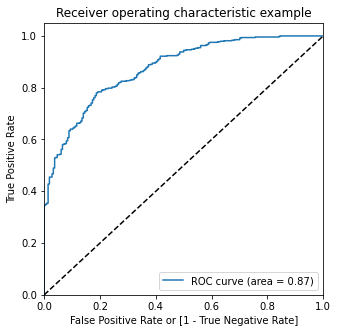

In [65]:
draw_roc(y_train_pred_final.credit_risk, y_train_pred_final.credit_risk_Prob)

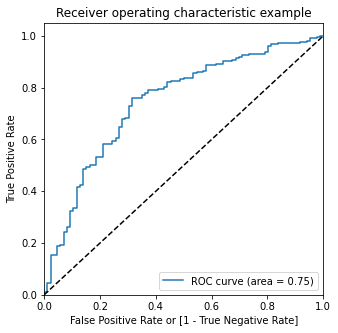

In [66]:
draw_roc(y_test_pred_final.credit_risk, y_test_pred_final.credit_risk_Prob)

In [67]:
#in model building we prefer test dataset prediction probabilities to decide optimum threshold
#on test dataset 
y_test_pred_final

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.credit_risk_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,Cust_ID,credit_risk,credit_risk_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,507,0.0,0.501540,1,1,1,1,1,1,1,0,0,0,0
1,818,1.0,0.479887,0,1,1,1,1,1,0,0,0,0,0
2,452,1.0,0.506672,1,1,1,1,1,1,1,0,0,0,0
3,368,0.0,0.497739,0,1,1,1,1,1,0,0,0,0,0
4,242,0.0,0.490658,0,1,1,1,1,1,0,0,0,0,0


     threshold  accuracy     sensi     speci
0.0        0.0  0.713333  1.000000  0.000000
0.1        0.1  0.713333  1.000000  0.000000
0.2        0.2  0.713333  1.000000  0.000000
0.3        0.3  0.713333  1.000000  0.000000
0.4        0.4  0.713333  1.000000  0.000000
0.5        0.5  0.750000  0.883178  0.418605
0.6        0.6  0.303333  0.028037  0.988372
0.7        0.7  0.286667  0.000000  1.000000
0.8        0.8  0.286667  0.000000  1.000000
0.9        0.9  0.286667  0.000000  1.000000


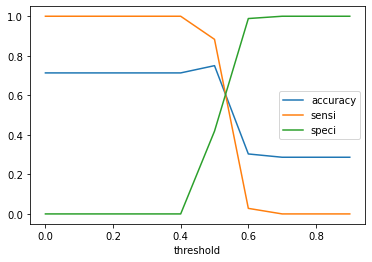

In [68]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.credit_risk, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='threshold', y=['accuracy','sensi','speci'])
plt.show()

Achieved

auc of 75
recall of 88
accuracy of 75

Achieved

auc of 85
recall of 70
accuracy of 83

business driving attributes

decision tree

Random Forest

Gradient boosting

Resume POints

